# 4.1 Eigenvalues and Eigenvectors

This section introduces eigenvalues and eigenvectors of a square matrix and explore some of its applications. 
The goal of this section is to dicssect the action of linear maps into elements that are easiy to visualize. 

## Motivation

Consider a linear map $T: \mathbb{R}^n\to \mathbb{R}^m$ defined by $\vec{x} \mapsto A\vec{x}$. Although $T$ moves $\vec{x}$ in veraity of directions but there are some vectors on which the action of $T$ is easy to underestand. For example, suppose $A = \begin{bmatrix} 3 & -2 \\ 1 & 0\\ \end{bmatrix}$, $\vec{u
} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$. Let's compute $A\vec{u}$

In [6]:
import numpy as np

A = np.array([[3,-2], [1,0]])
u = np.array([2,1])

A @ u


array([4, 2])

We can see that the image of $\vec{u
} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$ is 
$$
A\vec{u
} = \begin{bmatrix} 4 \\ 2 \end{bmatrix} = 2 \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 2 \vec{u}$$

In fact, $A$ _streches_ $\vec{u}$. 

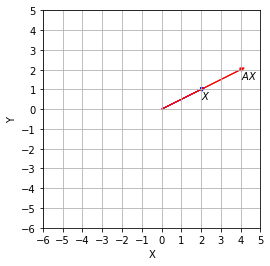

In [7]:
import matplotlib.pyplot as plt


def plot_map(vector, matrix):
    x1 = vector[0]
    y1 = vector[1]
    
    x2 = (A @ vector)[0]
    y2 = (A @ vector)[1]

    ax = plt.axes()
    
    ax.arrow(0, 0, x1, y1, head_width = 0.2,head_length = 0.2, fc ='b', ec ='b')
    ax.arrow(0, 0, x2, y2, head_width = 0.2,head_length = 0.2, fc ='r', ec ='r')

    ax.text(x1,y1 - 0.5,'$X$')
    ax.text(x2,y2-0.5,'$AX$')

    z = max(np.abs(x1), np.abs(x2), np.abs(y1),np.abs(y2))
            
    ax.set_xticks(np.arange(-z-2, z+2, step = 1))
    ax.set_yticks(np.arange(-z-2, z+2, step = 1))
    ax.set_aspect('equal')

    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    
    plt.grid()
    plt.show()


plot_map(u, A)

We are interested in such special vectors that, when transformed by matrix $A$, result in a scalar multiple of themselves. More generally, let $A$ be an $n\times n$ matrix. We seek non-trivial solutions to equations of the form:

$$
A\vec{x} = \lambda \vec{x} \quad \text{for some }\quad \lambda\in \mathbb{R}
$$

If $\vec{u}\neq 0$ is a solution for some $\lambda$, we call $\lambda$ an __eigenvalue__ and $\vec{u}$ an __eigenvector__ of $A$ corresponding to $\lambda$.

__Example 1__:

Consider the matrix equation:

$$
A\vec{u} = \begin{bmatrix} 4 \\ 2 \end{bmatrix} = 2 \begin{bmatrix} 2 \\ 1 \end{bmatrix} = 2 \vec{u}
$$

Observe that $\lambda = 2$ is an eigenvalue of $A$ and $\vec{u}$ is the corresponding eigenvector.

a. Is $\vec{v} = \begin{bmatrix} 1 \\ -1 \end{bmatrix}$ also an eigenvector of $A$?

b. Is $\lambda = 4$ an eigenvalue?

c. Show that $\lambda = 1$ is an eigenvalue and find an eigenvector for it.

__Solution__:

(a) Let's compute $A\vec{v}$:

In [8]:
v = np.array([1, -1])

A @ v

array([5, 1])

If there were a $\lambda$ such that $A\vec{v} = \lambda \vec{v}$, we would have obtained:

$$
\begin{bmatrix} 1 \\ -1 \end{bmatrix} = \lambda \begin{bmatrix} 5 \\ 1 \end{bmatrix}
$$

Which is not possible for any value of $\lambda$, and as can be seen in the figure below, the vector $\vec{v}$ does not satisfy the eigenvalue equation. 

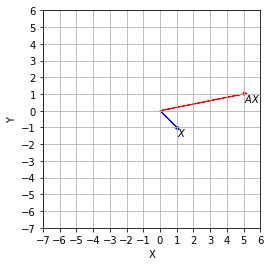

In [9]:
plot_map(v, A)


(b) No.  $\lambda = 4$ is a eigenvalue for $A$ if and only if $A\vec{x} = 4 \vec{x}$ has a non-trivial solution. Let's reformulate this problem in terms of a homogenous equation which is easier to deal with:

$$
A\vec{x} = 4 \vec{x}  \quad \iff \quad (A - 4 I_2) \vec{x} = 0
$$

The homogeneous equation $(A - 4 I_2) \vec{x} = 0$ has a non-trivial solution if and only if it has a free variable (a non-pivot column).

In [10]:
# identity matrix I_2
I_2 = np.eye(2)

A - 4*I_2

array([[-1., -2.],
       [ 1., -4.]])

Clearly, the columns of $A -4I$ are linearly independent; as a result, there is no free variable and the system has only trivial solution $\vec{x} = 0$. 


(c) $\lambda = 1$ is a eigenvalue for $A$ if and only if $A\vec{x} = 1 \vec{x}$ has a non-trivial solution. 
$$
A\vec{x} = \vec{x} \quad \iff \quad (A - I_2) \vec{x} = \vec{0}
$$


In [11]:
A - I_2

array([[ 2., -2.],
       [ 1., -1.]])

Since the columns of $(A - I_2)$ are linearly independent, there is a free variable and $\lambda = 1$ is an eigenvalue of $A$. To find a correponding eigenvector $\vec{u}$ we solve
$$(A - I_2)\vec{x} = 0$$ 

Let's set up the augmented matrix: 

In [12]:
# the augmented vector
b = np.array([[0],[0]])

# add to the matrix
M = np.concatenate((A - I_2, b), axis = 1) 
M

array([[ 2., -2.,  0.],
       [ 1., -1.,  0.]])

Let's recall the row operations: 

In [13]:
def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix

# Replacing a row by the sum of itself and a multiple of another 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

In [14]:
M1 = swap(M, 0, 1)
M1

array([[ 1., -1.,  0.],
       [ 2., -2.,  0.]])

In [15]:
M2 = replace(M1, 1, 0, -2)
M2

array([[ 1., -1.,  0.],
       [ 0.,  0.,  0.]])

A general solution for $(A - I_2)\vec{x} = 0$ is 

$$
\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} x_2 \\ x_2 \end{bmatrix} = x_2 \begin{bmatrix} 1 \\ 1 \end{bmatrix}, 
$$

and the set of all solutions is 

$$
\text{span}\left( \ \begin{bmatrix} 1 \\ 1 \end{bmatrix} \ \right)
$$

each non-zero element of this set is an eigenvector corresponding to $\lambda = 1$. 


The above simple example leads to a general case:


__Theorem 1__  

Let $A$ be an $n\times n$ matrix and $\lambda$ be a scalar. The following statements are equivalent:

1. $\lambda$ is an eigenvalue of $A$.

2. $(A - \lambda I_n) \vec{x} = 0 $ has non-trivial solution.

3. $det(A - \lambda I_n) = 0$

## Eigenspace and characteristic polynomial

$null(A - \lambda I_n)$ is a subspace of $\mathbb{R}^n$ and contains the zero vector and all eigenvectors corresponding to $\lambda$. This subspace is known as the __eigenspace__ of $A$ corresponding to $\lambda$, and is denoted by $E_{\lambda}$. Intuitively, a matrix acts as dilations on its eigenspaces.

__Example 2__ The set

$$
\text{span}\left( \ \begin{bmatrix} 1 \\ 1 \end{bmatrix} \ \right)
$$

Which we found in Example 1, is in fact the eigenspace $E_1$ of $A$ corresponding to $\lambda =1$. And any vector $\vec{u} \in E_1$ is preserved under the action of $A$ (dilations factor = 1): 

$$
A\vec{u} = \vec{u}
$$


The _polynomial_ $P(\lambda) = \det(A - \lambda I_n)$ is called the __characteristic polynomial__ of $A$. The zeros of this polynomial are precisely the eigenvalues of $A$. Thus, the polynomial can be factorized as:

$$
P(\lambda) = (\lambda - \lambda_0)^{m_0} (\lambda - \lambda_1)^{m_1} \dots (\lambda - \lambda_k)^{m_k}
$$

For each $\lambda_i$, where $0 \leq i \leq k$, the power $m_i$ is known as __the algebraic multiplicity__ of $\lambda_i$.


__Example 2__

Suppose $A = \begin{bmatrix} 4 & -1 & 6 \\ 0 & 1 & 6 \\ 0 & 0 & 8 \end{bmatrix}$. We will find all eigenvalues and their multiplicities of $A$ by finding its characteristic polynomial.

__Solution:__

The characteristic polynomial is given by:

$$
\det(A - \lambda I_3) = \begin{vmatrix} 4-\lambda & -1 & 6 \\ 0 & 1-\lambda & 6\\ 0 & 0 & 8-\lambda \end{vmatrix} = 0
$$

Expanding the determinant, we obtain the characteristic polynomial:

$$
P(\lambda) = (4 - \lambda)(1 - \lambda)(8 -\lambda)$$.

The zeros of this polynomial (the eigenvalues of $A$) are $\lambda = 4$ with multiplicity $1$, $\lambda = 1$ with multiplicity $1$, and $\lambda = 8$ with multiplicity $1$.


__Example 3__ Let $A$ be the matrix given in Example 2. For each eigenvalue that we found in Example 2, find the corresponding eigenspace together with its dimention.


__Solution:__

The eigenspace coresponding to $\lambda = 4$:

$$
E_4 = null(A - 4I) = \{ \vec{x}: \ \ \ (A - 4I)\vec{x} = 0 \} =
$$

$$
 \left\{\  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} 0 & -1 & 6 \\ 0 & -3 & 6\\ 0 & 0 & 4 \end{bmatrix} \begin{bmatrix} x\\ y\\ z  \end{bmatrix} = 0 \  \right\} = \left\{  \  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} - y + 6z \\ -3y +6z\\ 4z \end{bmatrix} = \begin{bmatrix} 0\\ 0\\ 0  \end{bmatrix} \  \right\} 
$$

Therefore, 

$$
E_4 = \left\{ \ \begin{bmatrix} x\\ 0\\ 0  \end{bmatrix}:  x\in \mathbb{R}\ \right\} = span\left( \ \begin{bmatrix} 1 \\ 0 \\ 0  \end{bmatrix} \ \right) \quad \text{and} \quad dim(E_4) = 1
$$


The eigenspace coresponding to $\lambda = 1$:


$$
E_1 = null(A - I) = \{ \vec{x}: \ \ \ (A - I)\vec{x} = 0 \} = 
$$

$$
\left\{\  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} 3 & -1 & 6 \\ 0 & 0 & 6\\ 0 & 0 & 7 \end{bmatrix} \begin{bmatrix} x\\ y\\ z  \end{bmatrix} = 0 \  \right\} = \left\{  \  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} 3x - y + 6z \\ 6z\\ 7z \end{bmatrix} = \begin{bmatrix} 0\\ 0\\ 0  \end{bmatrix} \  \right\} 
$$

Therefore, 

$$
E_1 = \left\{\begin{bmatrix} x\\ 3x\\ 0  \end{bmatrix}:  x\in \mathbb{R} \right\} = span\left(  \begin{bmatrix} 1 \\ 3 \\ 0  \end{bmatrix} \right) \quad \text{and} \quad dim(E_1) = 1
$$

The eigenspace coresponding to $\lambda = 8$

$$
E_8 = null(A - 8I) = \{ \vec{x}: \ \ \ (A - 8I)\vec{x} = 0 \} =
$$

$$
\left\{\  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} -4 & -1 & 6 \\ 0 & -7 & 6\\ 0 & 0 & 0 \end{bmatrix} \begin{bmatrix} x\\ y\\ z  \end{bmatrix} = 0 \  \right\} = \left\{  \  \begin{bmatrix} x\\ y\\ z  \end{bmatrix}: \ \ \ \begin{bmatrix} -4x - y + 6z \\ -7y + 6z\\ 0 \end{bmatrix} = \begin{bmatrix} 0\\ 0\\ 0  \end{bmatrix} \  \right\} 
$$

Therefore, 

$$
E_8 = \left\{\begin{bmatrix} \frac{6}{4}\\ 1 \\ \frac{7}{6}  \end{bmatrix}:  y\in \mathbb{R} \right\} = span\left(  \begin{bmatrix} 9 \\ 6\\ 7  \end{bmatrix} \right) \quad \text{and} \quad dim(E_8) = 1
$$


Before we move on to the nect tpoic, let us check our calculation using `numpy.linalg.eig` from NumPy linear algebra:

In [79]:
A = np.array([[4, -1, 6], [0, 1, 6], [0, 0, 8]])

evalues , evectors = np.linalg.eig(A)

for i in range(evalues.shape[0]):
    print(evalues[i], ' is an eigenvector with ', evectors[:,i], ' as the coresponding eigenvectors')

4.0  is an eigenvector with  [1. 0. 0.]  as the coresponding eigenvectors
1.0  is an eigenvector with  [0.31622777 0.9486833  0.        ]  as the coresponding eigenvectors
8.0  is an eigenvector with  [0.69853547 0.46569032 0.54330537]  as the coresponding eigenvectors


Note that `numpy.linalg.eig` returns the unit vector of eigenvalues, and that is why we see different eigen vectors. To check that let's normalize the eigenvector $\begin{bmatrix} 9\\6\\7 \end{bmatrix}$ coresponding to $\lambda = 8$: 

In [80]:
v = np.array([9,6,7])

#normalizing v 
e_v = v/np.linalg.norm(v)
e_v

array([0.69853547, 0.46569032, 0.54330537])

Let's have another look at Example 2. The eigenvalues are the entries on the main diagonal. This is always true for triangular matrices and can be proved by induction:

__Theorem 3__ 

Let $A$ be a square triangular matrix. Then the eigenvalues of $A$ are the entries on the diaganl. 


__Numerical Notes__


1. Example 3 provides a method for manually computating eigenvectors in simple cases. In practical situations, using matrix program and row reduction method to find an eigenspace (for a specified eigenvalue) may not be entirely reliable. Roundoff error can occasionally lead to a reduced echelon form with the wrong number of pivots. The best computer programs compute approximations for eigenvalues and eigenvectors simultaneously, to any desired degree of accuracy, for matrices that are not too large.


2. Some software such as Mathematica and Maple can use symbolic calculations to find the characteristic polynomial of a moderate-sized matrix. But there is no formula or finite algorithm to solve the characteristic equation of a general  matrix $n\times n$ for $n\geq 5$. The best numerical methods for finding eigenvalues avoid the characteristic polynomial entirely. In fact, MATLAB finds the characteristic polynomial of a matrix $A$ by first computing the eigenvalues $\lambda_1, \lambda_2, \dots, \lambda_n$ of $A$ and then expanding the product 

$$
(\lambda -\lambda_1)(\lambda -\lambda_2)\dots (\lambda -\lambda_n)
$$



__Excercies:__
    
1. If $\vec{v}$ is an eigenvector of $A$ corresponding to $\lambda$, what is $A^3 \vec{v}$?   


2. If A is an $n\times n$ matrix and $2$ is an eigenvalue of $A$, show that $4$ is an eigenvalue of $2A$.

3. If $A$ is an invertible matrix with eigenvalue $\lambda$ show that $A^{-1}$ has eigenvalue $1/\lambda.$ 
    
4.  Let $A = \begin{bmatrix} 1 & 3 & 3\\ -3 & -5 &-3\\ 3 & 3 & 1 \end{bmatrix}$. 

    a. Find the eigenvalues of $A$ and their multiplicities.
    
    b. For each eigenvalue in part (a) find the corresponding eigenspace. 
    
    c. Find the dimension of each eigenspace in part (b) by finding a basis for it. How this result is related to your answer to part (a)?   

    